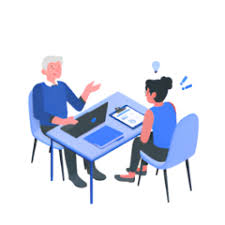

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import levene
from scipy.stats import mannwhitneyu

# DATA LOADING

In [2]:
data=pd.read_csv(r"C:\Users\dell\Downloads\Placement_Data_Full_Class.csv")

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# DATA CLEANING & PREPROCESSING:

In [4]:
data.shape

(215, 15)

In [5]:
data.size

3225

In [6]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
mean_salary = data['salary'].median()
data['salary'].fillna(mean_salary, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_6436\1274892694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['salary'].fillna(mean_salary, inplace=True)


In [11]:
data.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
for i in data.columns:
    print(i)
    print(data[i].unique())

sl_no
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
gender
['M' 'F']
ssc_p
[67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79

In [14]:
int=data.select_dtypes(include='int')

In [15]:
int

,sl_no
0,1
1,2
2,3
3,4
4,5
...,...
210,211
211,212
212,213
213,214


# EDA(Exploratory Data Analysis)


### COUNT PLOT:

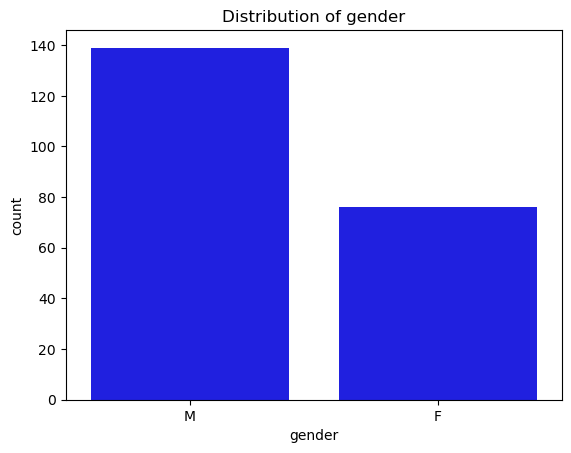

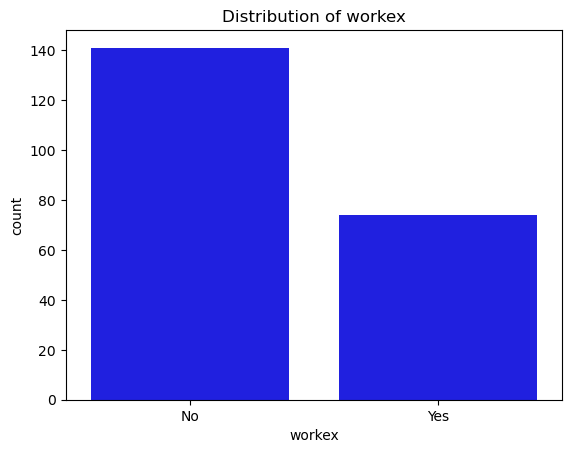

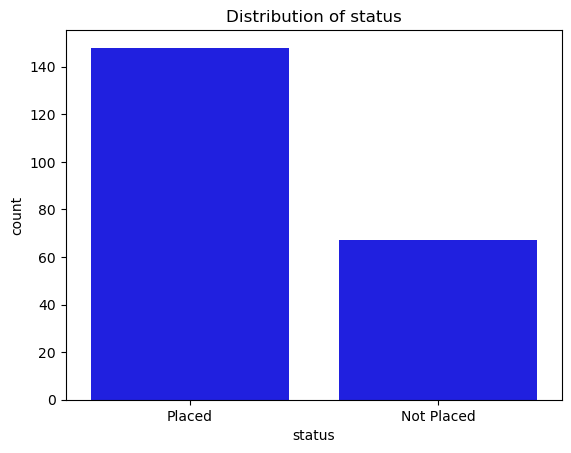

In [16]:
categorical = ['gender','workex','status']

for col in categorical:
    sns.countplot(x=col,color='blue', data=data)
    plt.title(f"Distribution of {col}")
    plt.show()

# HIST PLOT:

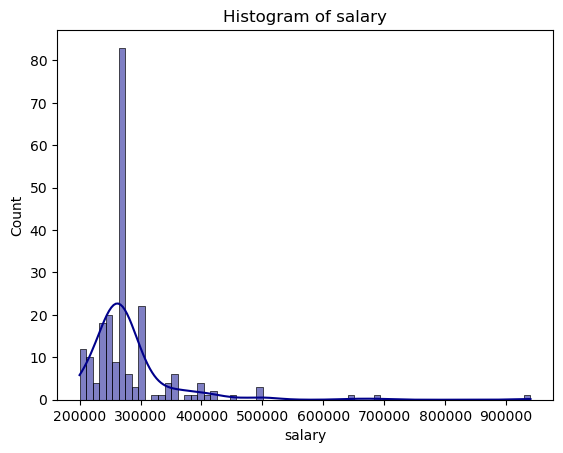

In [17]:
numerical = ['salary']

for col in numerical:
    sns.histplot(data[col], kde=True, color='darkblue')
    plt.title(f"Histogram of {col}")
    plt.show()

In [18]:
data['salary']=data['salary'].fillna(data['salary'].median())

In [19]:
data.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# BOX PLOT:

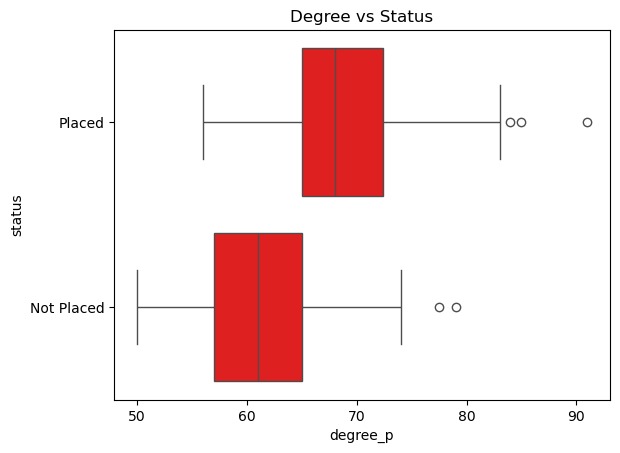

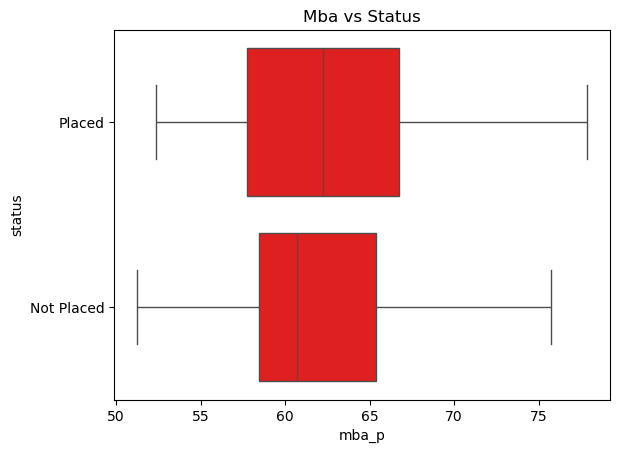

In [20]:
sns.boxplot(x='degree_p', y='status',color='red', data=data)
plt.title("Degree vs Status")
plt.show()

sns.boxplot(x='mba_p', y='status',color='red', data=data)
plt.title("Mba vs Status")
plt.show()

# HEAT MAP:


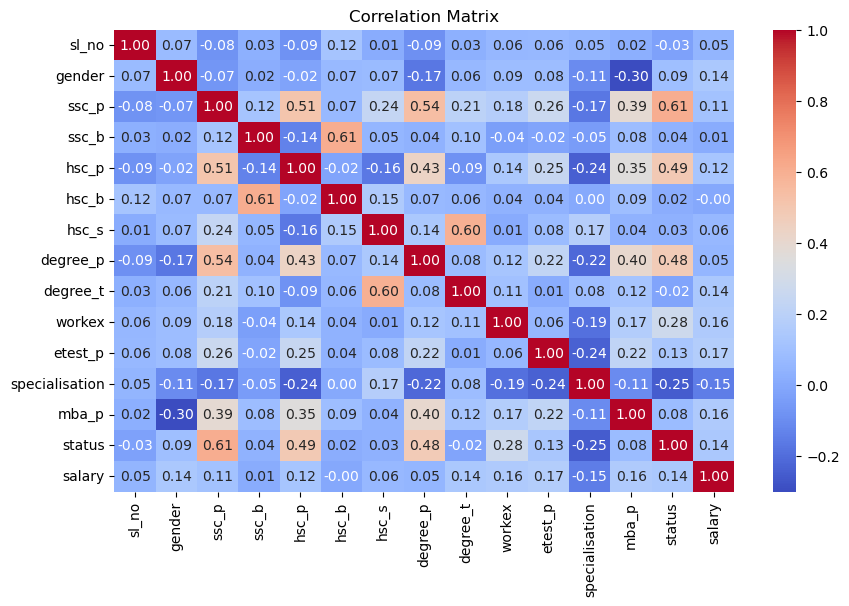

In [21]:
from sklearn.preprocessing import LabelEncoder
df = data.copy()
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# PAIR PLOT:

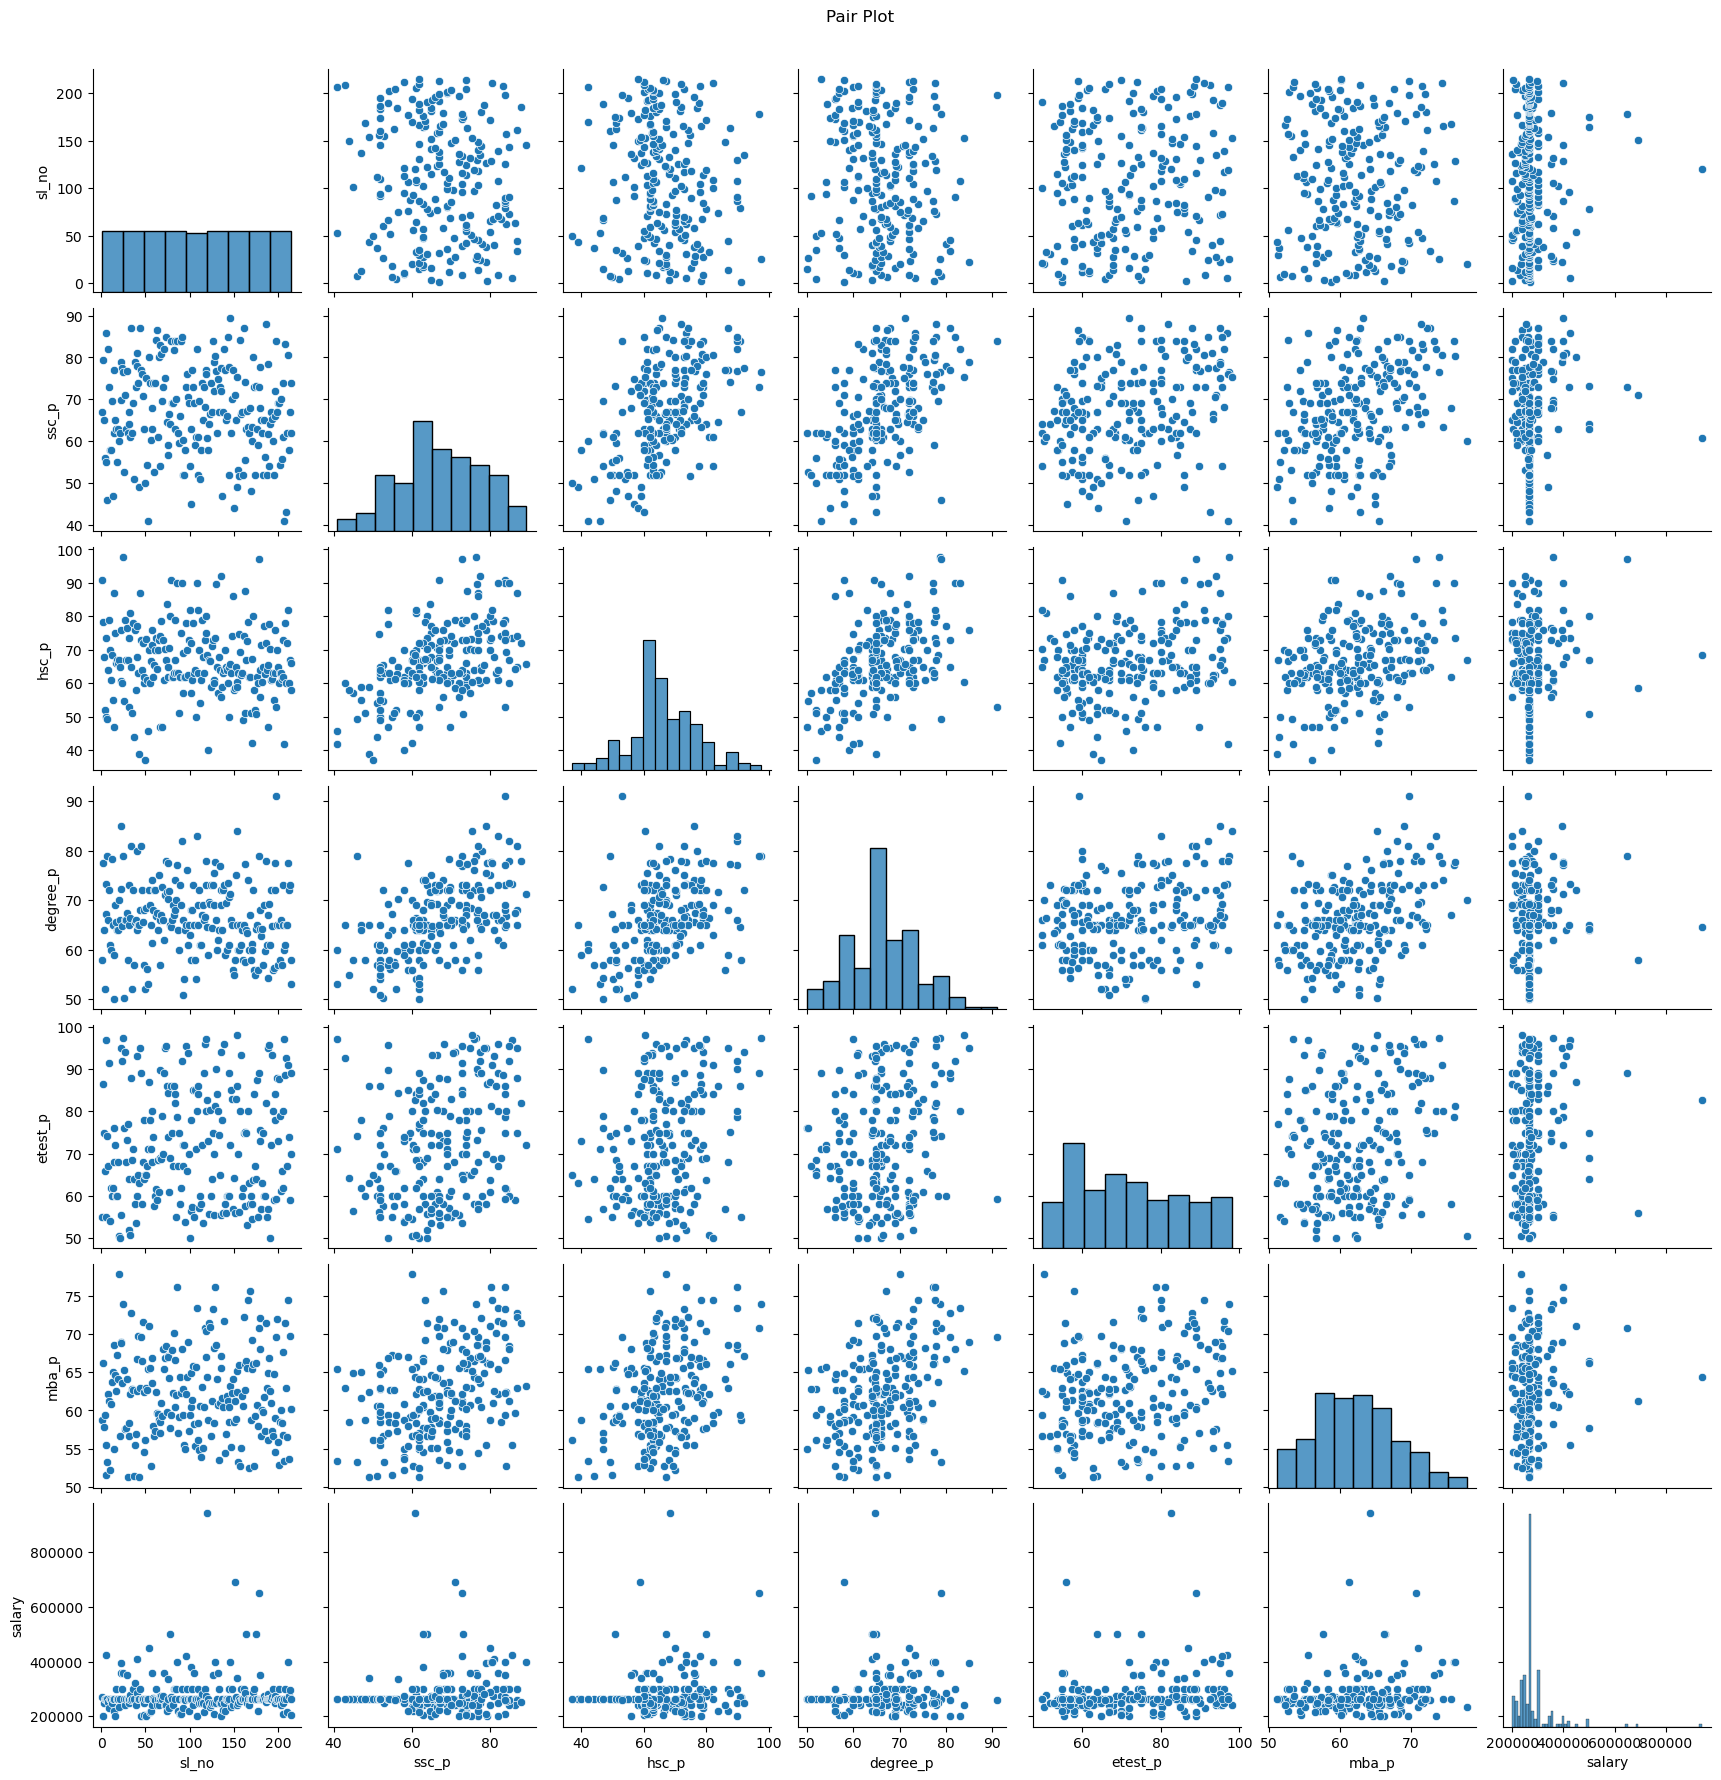

In [22]:
sns.pairplot(data)
plt.suptitle("Pair Plot", y=1.02)
plt.show()


# BOX PLOT:

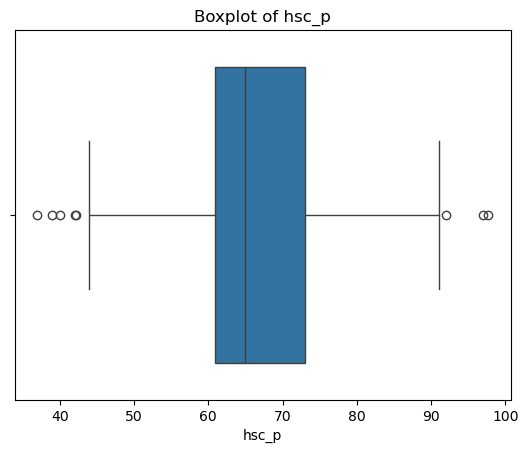

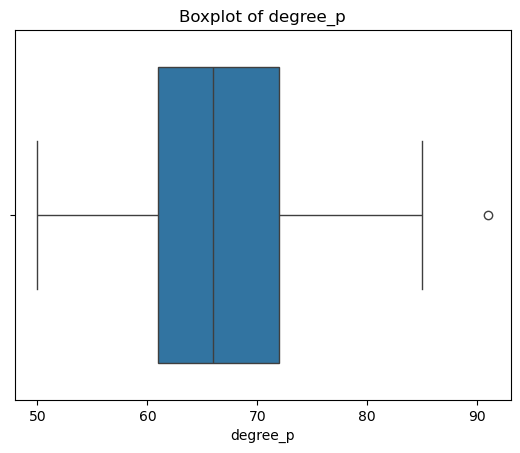

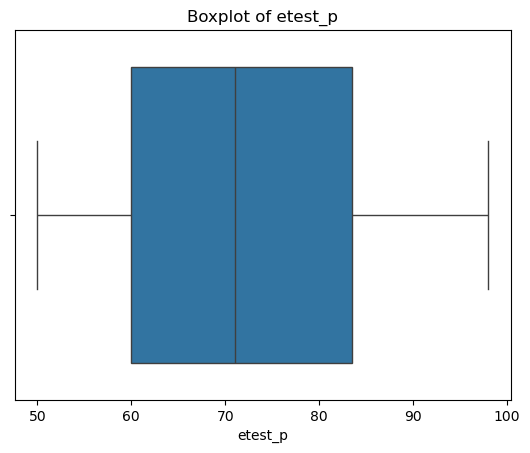

In [23]:
for col in ['hsc_p', 'degree_p', 'etest_p']:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Z-TEST:

* Null Hypothesis (H0):This is the default assumption that there is no difference between the population means or that the mean difference is zero.


* Alternative Hypothesis (H1):This is the assumption that there is a difference between the population means.

In [24]:
z_stat,p_val=ztest(data['mba_p'],data['salary'],value=0)

In [25]:
p_val

np.float64(0.0)

In [26]:
if p_val<0.05:
    print("null hypothesis rejected")

else:
    print("null hypothesis accepted")

null hypothesis rejected


# T-TEST:

In [27]:
t_stat, p_val1 = ttest_ind(data['etest_p'],data['salary'])

In [28]:
p_val1


np.float64(2.9514289053994383e-189)

In [29]:
if p_val<0.05:
    print("null hypothesis rejected")

else:
    print("null hypothesis accepted")

null hypothesis rejected


# CHI SQUARE-TEST:


In [30]:
categorical_cols = ['gender','status','hsc_s']

In [31]:
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['status'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square test between {col} and charges:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(contingency_table)
    print("\n")
    
    # Decision based on p-value
    if p_val < 0.05:
        print(f"There is a statistically significant association between {col} and status.")
    else:
        print(f"There is no statistically significant association between {col} and status.")
    print("\n")



Chi-square test between gender and charges:
Chi2 Statistic: 1.3817539668505108
P-value: 0.23980260881037566
Degrees of Freedom: 1
Contingency Table:
status  Not Placed  Placed
gender                    
F               28      48
M               39     100


There is no statistically significant association between gender and status.


Chi-square test between status and charges:
Chi2 Statistic: 210.36361074158467
P-value: 1.1442912259493803e-47
Degrees of Freedom: 1
Contingency Table:
status      Not Placed  Placed
status                        
Not Placed          67       0
Placed               0     148


There is a statistically significant association between status and status.


Chi-square test between hsc_s and charges:
Chi2 Statistic: 1.114745132708414
P-value: 0.5727118511343621
Degrees of Freedom: 2
Contingency Table:
status    Not Placed  Placed
hsc_s                       
Arts               5       6
Commerce          34      79
Science           28      63


There is no s

# ANOVA

In [32]:
anova_data=data[['mba_p','salary']]

In [33]:
groups=anova_data.groupby('mba_p')['salary'].apply(list)
groups

mba_p
51.21    [265000.0]
51.29    [265000.0]
51.45    [265000.0]
51.58    [265000.0]
52.21    [265000.0]
            ...    
74.56    [265000.0]
75.71    [265000.0]
76.18    [400000.0]
76.26    [400000.0]
77.89    [236000.0]
Name: salary, Length: 205, dtype: object

In [34]:
f_statistic, p_value = stats.f_oneway(*groups)

In [35]:
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 4.01136109001651
P-value: 0.009510285050087445


In [36]:
if p_value < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There are no significant differences between the groups.")


There are significant differences between the groups.


# F-TEST:

In [37]:
data.shape

(215, 15)

In [38]:
object = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object:
    data[col] = le.fit_transform(data[col].astype(str))
print(data.head())

   sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1       1  67.00      1  91.00      1      1     58.00         2   
1      2       1  79.33      0  78.33      1      2     77.48         2   
2      3       1  65.00      0  68.00      0      0     64.00         0   
3      4       1  56.00      0  52.00      0      2     52.00         2   
4      5       1  85.80      0  73.60      0      1     73.30         0   

   workex  etest_p  specialisation  mba_p  status    salary  
0       0     55.0               1  58.80       1  270000.0  
1       1     86.5               0  66.28       1  200000.0  
2       0     75.0               0  57.80       1  250000.0  
3       0     66.0               1  59.43       0  265000.0  
4       0     96.8               0  55.50       1  425000.0  


In [39]:
scaler = StandardScaler()
data['status'] = scaler.fit_transform(data[['status']])
print(data[['status']].head())

     status
0  0.672832
1  0.672832
2  0.672832
3 -1.486255
4  0.672832


In [40]:
x = data.drop('status', axis=1)
y = data['status']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [44]:
n = len(y_test)
p = x_train.shape[1]

In [45]:
n

65

In [46]:
p

14

In [47]:
RSS = np.sum((y_test-y_pred)**2)

In [48]:
TSS = np.sum((y_test-np.mean(y_test))**2)

In [49]:
ESS = TSS-RSS

In [50]:
MSE = RSS/(n-p-1)

In [51]:
MSR = ESS/p

In [52]:
F_statistics = MSR/MSE

In [53]:
p_value = 1-stats.f.cdf(F_statistics,p,n-p-1)

In [54]:
print('F-statistic:', F_statistics)
print('p-value:', p_value)

F-statistic: 2.9996312161680385
p-value: 0.0021536502872792074


In [55]:
if p_value < 0.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")

null hypothesis rejected


### Mann–Whitney U Test

In [63]:
from scipy.stats import mannwhitneyu

In [65]:
group1 = data[data['mba_p'] == 'A']['salary']
group2 = data[data['mba_p'] == 'B']['salary']

In [68]:
stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

C:\Users\dell\AppData\Local\Temp\ipykernel_6436\4076297591.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(group1, group2, alternative='two-sided')


In [69]:
print("Mann–Whitney U Statistic:", stat)
print("p-value:", p)


Mann–Whitney U Statistic: nan
p-value: nan


In [70]:
if p < 0.05:
    print("✅ Significant difference between the two groups.")
else:
    print("❌ No significant difference between the two groups.")

❌ No significant difference between the two groups.
